In [32]:
%load_ext lab_black
import warnings
import urllib

warnings.filterwarnings("ignore")
from datetime import datetime
import numpy as np
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.style.use("default")

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


Loading the data

In [33]:
data_2021 = pd.read_csv("../data/airbnb_listings_2021.csv")
data_2021.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

Dropping irrelevant columns and those that are unethical to use

In [34]:
data_2021.drop(
    [
        "id",
        "host_name",
        "last_review",
        "license",
        "host_id",
        "number_of_reviews",
        "reviews_per_month",
        "number_of_reviews_ltm",
    ],
    axis=1,
    inplace=True,
)

Replacing the missing values for numerical columns with mean and mode

In [35]:
data_2021["price"] = data_2021["price"].fillna(data_2021["price"].mean())
data_2021["minimum_nights"] = data_2021["minimum_nights"].fillna(
    data_2021["minimum_nights"].mean()
)
data_2021["name"] = data_2021["name"].fillna(data_2021["name"].mode()[0])
data_2021["calculated_host_listings_count"] = data_2021[
    "calculated_host_listings_count"
].fillna(data_2021["calculated_host_listings_count"].mean())
data_2021["availability_365"] = data_2021["availability_365"].fillna(
    data_2021["availability_365"].mean()
)
data_2021["neighbourhood_group"] = data_2021["neighbourhood_group"].fillna(
    data_2021["neighbourhood_group"].mode()[0]
)
data_2021.isnull().sum()

name                              0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

We remove extreme values in the variable 'price' for better visualization results. We then filter for price values less than 250

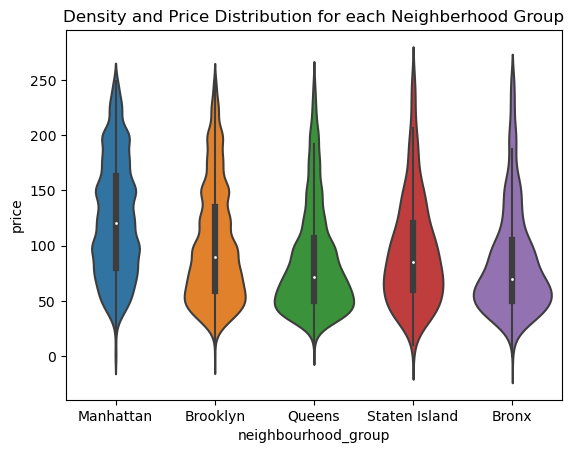

In [36]:
data2 = data_2021[data_2021.price < 250]
# using a violinplot to showcase density and distribtuion of prices
violinplot = sns.violinplot(data=data2, x="neighbourhood_group", y="price")
violinplot.set_title("Density and Price Distribution for each Neighberhood Group")

violinplot = violinplot.get_figure()
violinplot.savefig("../artifacts/violinplot.png", transparent=False)

Top 10 neighbourhoods by calculated host listing count

In [37]:
neighborhood_top10 = (
    data2.groupby(["neighbourhood"])["calculated_host_listings_count"]
    .count()
    .to_frame()
    .sort_values(["calculated_host_listings_count"], ascending=[False])
    .head(10)
)
neighborhood_top10

,calculated_host_listings_count
neighbourhood,
Bedford-Stuyvesant,2401
Williamsburg,2224
Harlem,1769
Bushwick,1557
Hell's Kitchen,1153
Upper West Side,1151
Upper East Side,1139
Crown Heights,1071
East Village,995


Top 5 Neighbourhoods by Calculated Host Listings based on Room Type

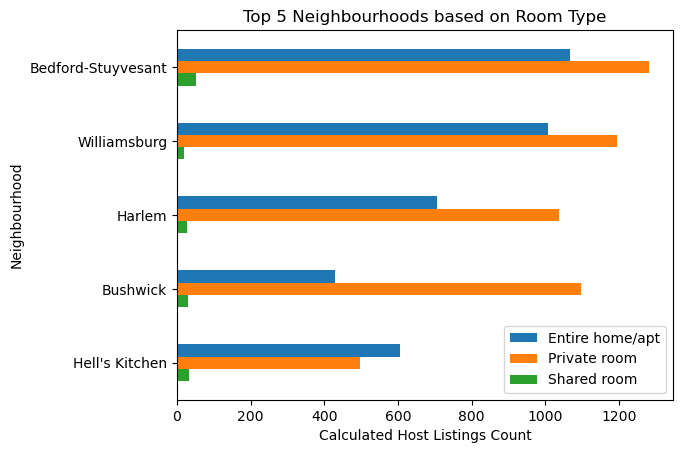

In [38]:
neighborhood_top5 = neighborhood_top10.head(5)
neighborhood_top5_2 = (
    data2.groupby(["neighbourhood", "room_type"])["room_type"]
    .size()
    .unstack(fill_value=20)
)
neighborhood_top5_count = pd.merge(
    neighborhood_top5, neighborhood_top5_2, how="left", on=["neighbourhood"]
)
neighborhood_top5_count = neighborhood_top5_count[
    ["Entire home/apt", "Private room", "Shared room"]
]
barplot = neighborhood_top5_count.plot(kind="barh")
plt.title("Top 5 Neighbourhoods based on Room Type")
plt.xlabel("Calculated Host Listings Count")
plt.ylabel("Neighbourhood")
ax = plt.gca()
ax.invert_yaxis()

barplot = barplot.get_figure()
barplot.savefig("../artifacts/barplot.png", transparent=False)

Dropping hotel room values and focusing on the other three main room categories

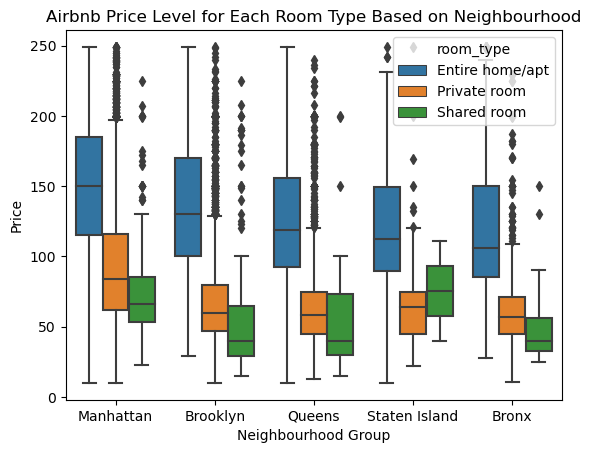

In [39]:
data2.drop(data2.index[data2["room_type"] == "Hotel room"], inplace=True)

# Boxplot for Airbnb Price Level for Each Room Type Based on Neighbourhood
Boxplot = sns.boxplot(y="price", data=data2, x="neighbourhood_group", hue="room_type")
plt.title("Airbnb Price Level for Each Room Type Based on Neighbourhood")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")

Boxplot = Boxplot.get_figure()
Boxplot.savefig("../artifacts/Boxplot.png", transparent=False)

A price map based on longitute and latitude

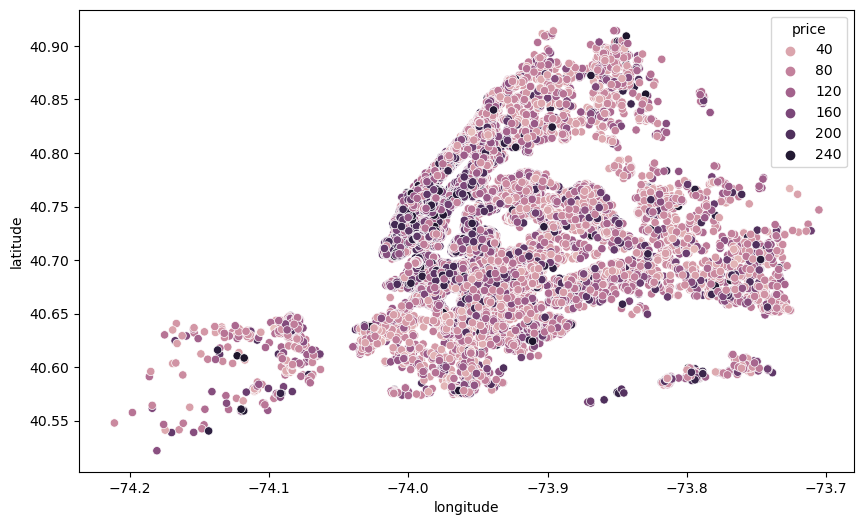

In [40]:
cmap = sns.cubehelix_palette(dark=0.1, light=0.8, as_cmap=True)
heatmap1 = plt.figure(figsize=(10, 6))
sns.scatterplot(
    data2.longitude, data2.latitude, hue=data2.price, palette=cmap, sizes=(30, 200)
)
plt.ioff()

heatmap1 = heatmap1.get_figure()
heatmap1.savefig("../artifacts/heatmap1.png", transparent=False)

Map by neighbourhood group based on latitute and longitude

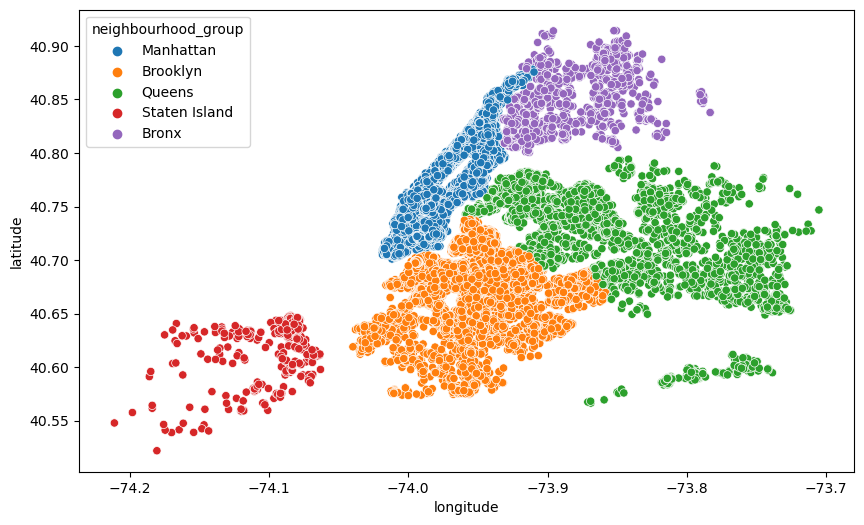

In [41]:
heatmap2 = plt.figure(figsize=(10, 6))
sns.scatterplot(data2.longitude, data2.latitude, hue=data2.neighbourhood_group)
plt.ioff()

heatmap2 = heatmap2.get_figure()
heatmap2.savefig("../artifacts/heatmap2.png", transparent=False)

Visualizing keywords used for airbnb listings

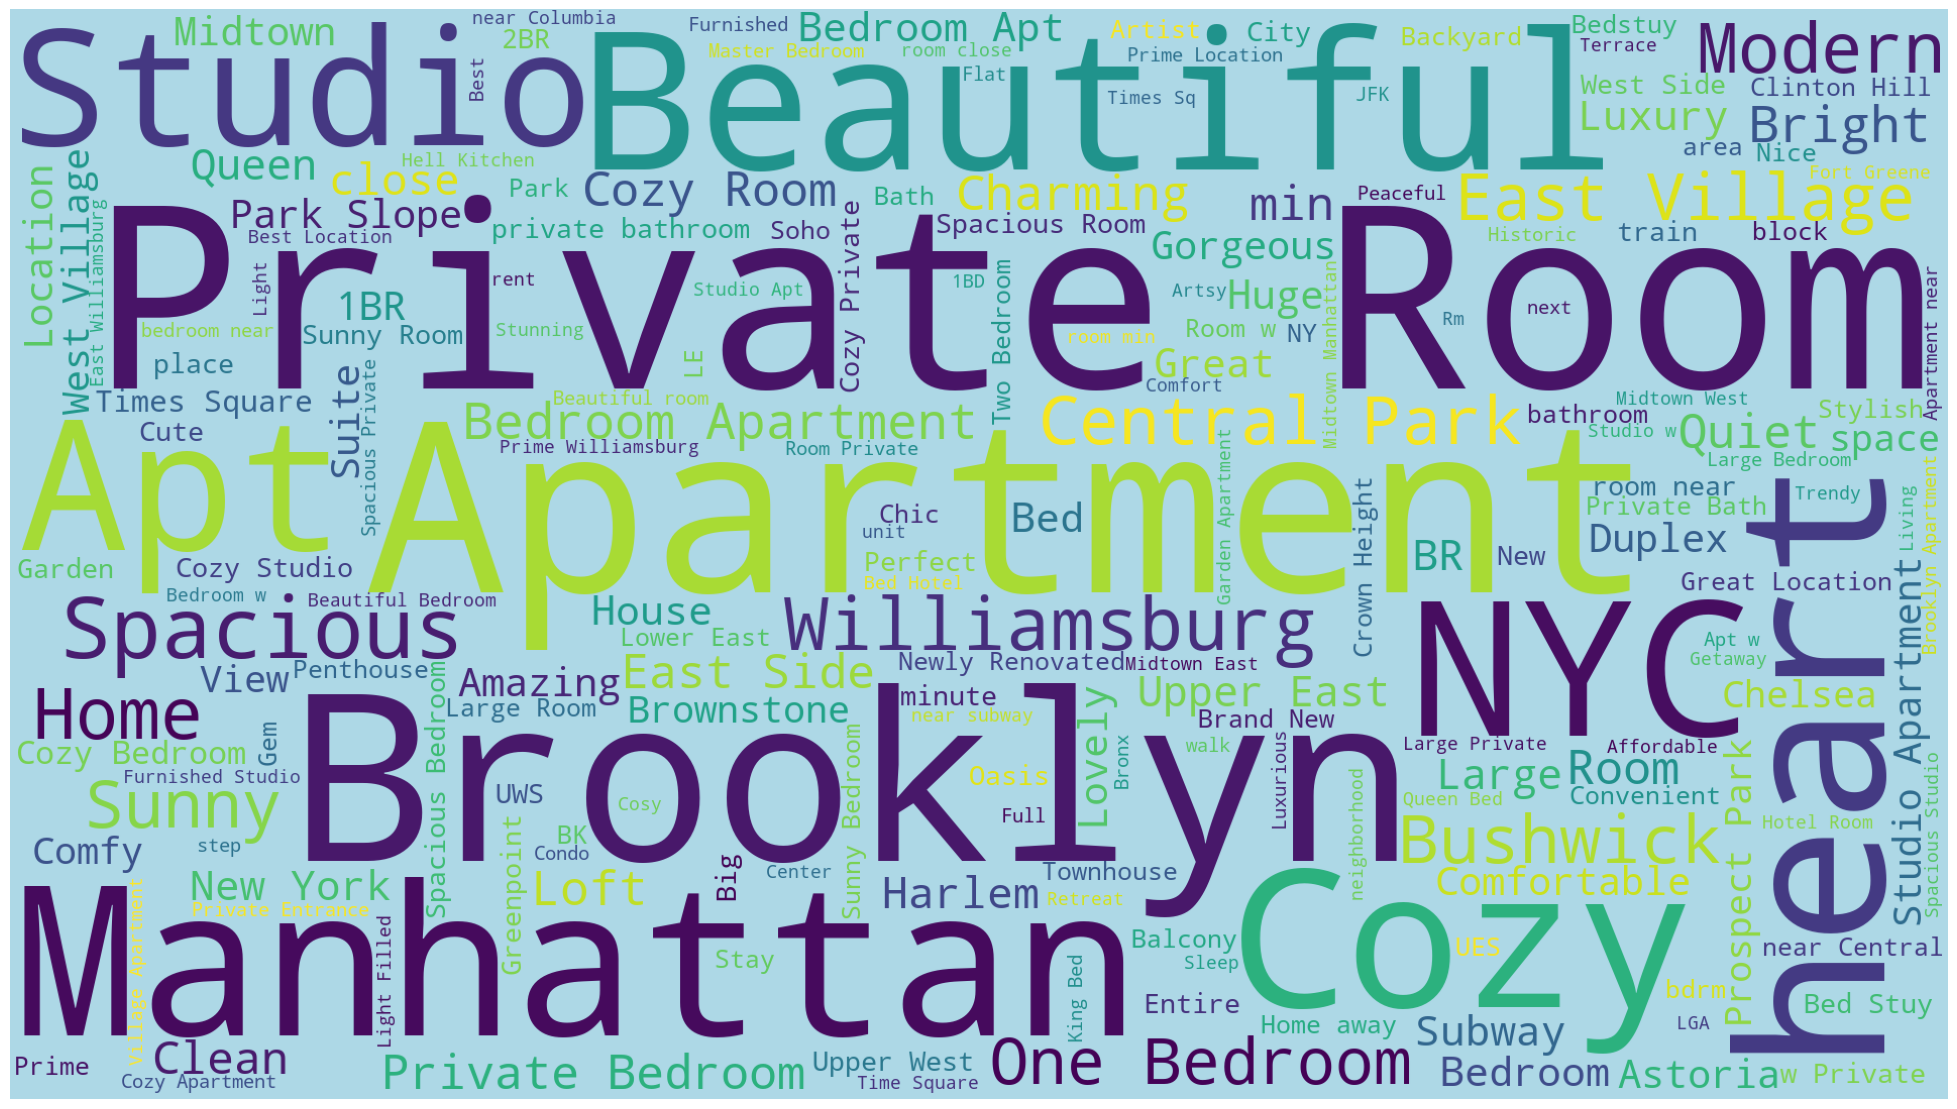

In [42]:
plt.subplots(figsize=(25, 15))
wordcloud = WordCloud(background_color="lightblue", width=1920, height=1080).generate(
    " ".join(data2.name)
)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Conclusions from this notebook: 

We did some preliminary analysis and visualizations in order to better understand our data. We created a violin plot to showcase density and distribtuion of prices in different New York City neighbourhoods. We remove extreme values from the price variable by limiting this analysis on prices less than $250. It is clear from the plot that Manhattan has the highest average airbnb price among neighbourhood groups. We also show top 5 neighbourhoods by room type based on calculated host listings. It is possible that hosts with more listings charge higher prices. This might be an indicator that more experienced hosts know the market better. This plot shows that Bedford-Stuyvesant has the highest calculated host listings, so we would expect to see higher prices in this neighbourhood group compared to other neighbourhood groups. Further, private rooms have more host listings than entire home/apt in all instances except for Hell's Kitchen. We also created a boxplot showing airbnb prices for each neighborhood group based on room type. We can see from the boxplot that Manhattan has the highest airbnb prices among neighbourhood, followed by Brooklyn and Queens. In all instances, entire home/apartments are more expensive than private rooms and shared rooms. The heatmap below shows airbnb prices in New York City based on latitute and longitude. The second heatmap shows each major neighbourhood group in New York City based on latitute and longitude.